In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
IMAGE_SIZE = [224, 224]

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
for layer in mobilnet.layers:
    layer.trainable = False

In [14]:
folders = glob('Dataset/Train/*')
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [15]:
mobilnet.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
x = Flatten()(mobilnet.output)

In [29]:
#prediction = Dense(500,activation="relu")(x)
#prediction = Dense(len(folders), activation='softmax')(prediction)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [30]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [31]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [34]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [35]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 149s 12s/step - loss: 1.2935 - accuracy: 0.5096 - val_loss: 0.5096 - val_accuracy: 0.7388
Epoch 2/50
13/13 [==============================] - 152s 12s/step - loss: 0.5091 - accuracy: 0.7380 - val_loss: 0.5719 - val_accuracy: 0.7090
Epoch 3/50
13/13 [==============================] - 155s 12s/step - loss: 0.3987 - accuracy: 0.8269 - val_loss: 0.4257 - val_accuracy: 0.8134
Epoch 4/50
13/13 [==============================] - 156s 12s/step - loss: 0.3297 - accuracy: 0.8846 - val_loss: 0.4863 - val_accuracy: 0.7612
Epoch 5/50
13/13 [==============================] - 155s 12s/step - loss: 0.3352 - accuracy: 0.8510 - val_loss: 0.3630 - val_accuracy: 0.8134
Epoch 6/50
13/13 [==============================] - 155s 12s/step - loss: 0.2724 - accuracy: 0.9183 - val_loss: 0.3700 - val_accuracy: 0.8358
Epoch 7/50
13/13 [==============================] - 155s 12s/step - loss: 0.2629 - accuracy: 0.9062 - val_loss: 0.3628 - val_accuracy: 0.8657
Epoch 

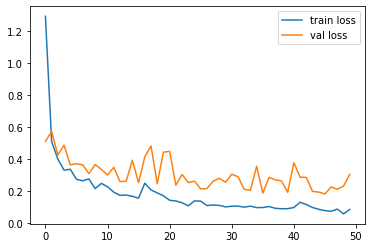

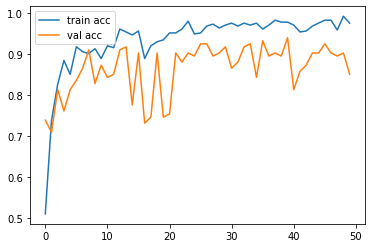

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')